# Here i am importing some important library 

# Here loading the iris data

In [229]:

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [71]:
iris = load_iris()
X = iris.data
y = iris.target

print("initial shape of x",X.shape)
print("initial shape of y",y.shape)


initial shape of x (150, 4)
initial shape of y (150,)


In [187]:
# Normalize the features
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder()
one_hot=onehot.fit_transform(y.reshape(-1,1)).toarray()


from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
# scaler = StandardScaler()
x= scaler.fit_transform(X)

print("after scaling shape of x",X.shape)
print("after encoding target the shape is",one_hot.shape)


after scaling shape of x (150, 4)
after encoding target the shape is (150, 3)


In [188]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,one_hot, test_size=0.3, random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((105, 4), (45, 4), (105, 3), (45, 3))

In [189]:
# here we assigning the input_layer ,hidden_layer,output_layer

num_features = x_train.shape[1] 
hidden_layer =4
classes =3

In [190]:
#calculating the waits and bias

weight1=  np.random.normal(size=[num_features,hidden_layer ])
bias1 = np.zeros((1,hidden_layer))
bias2=  np.zeros((1,classes))
print( weight1.shape)
print(bias1.shape)
print(bias2.shape)


(4, 4)
(1, 4)
(1, 3)


In [191]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
# print

In [192]:
def softmax( x):
        exps = np.exp(x - np.max(x, axis=1))
        return exps / np.sum(exps, axis=1 )

# calculating the hidden_layer_output

In [193]:
def train(x):
    hidden_layer_output = sigmoid(np.dot(x, weight1) + bias1)
    return hidden_layer_output


# calculating the beta value 

In [194]:
x=train(x_train)
H_t=np.transpose(x)
print('shape of h_transpose',H_t.shape)

H_inverse = np.dot(np.linalg.inv(np.dot(H_t, H)),H_t)
beta = np.dot(H_inverse,y_train)
print("shape of beta", beta.shape)

shape of h_transpose (4, 105)
shape of beta (4, 3)


In [195]:
def forward(x):
    output_layer_output = train(x)
    y=np.dot(output_layer_output,beta)+bias2
    return y



In [196]:
pred=forward(x_test)
print(pred)
# output=np.array(pred)
# print(output.shape)
# output2=output.reshape(105,3)
# # print(pred)
# y_test.shape

[[-0.25322256  0.58627107  0.68139528]
 [ 0.43616426  0.5108318   0.7533658 ]
 [-0.72103063  0.6100804   0.82855666]
 [-0.26253431  0.63379977  0.77331792]
 [-0.36298918  0.56913777  0.77289496]
 [ 0.386466    0.48723231  0.71355124]
 [-0.11387584  0.60824205  0.7510208 ]
 [-0.4895819   0.69924738  1.00361514]
 [-0.39351152  0.51583202  0.64489503]
 [-0.17803482  0.5660185   0.690109  ]
 [-0.38659174  0.7106828   0.93082693]
 [ 0.43504697  0.43137096  0.54304713]
 [ 0.45823528  0.45926034  0.70017199]
 [ 0.43393338  0.442734    0.56227254]
 [ 0.50412022  0.53418413  0.71295184]
 [-0.25328462  0.68776951  0.8723175 ]
 [-0.49038607  0.71418526  0.89418732]
 [-0.1742472   0.53656944  0.61137137]
 [-0.21096925  0.61526559  0.68570262]
 [-0.50274983  0.68673857  0.86334297]
 [ 0.43726069  0.48365985  0.58030353]
 [-0.33239987  0.68273829  0.83842582]
 [ 0.40979035  0.51487719  0.67618299]
 [-0.48792731  0.67793551  0.84254148]
 [-0.51281475  0.74043374  1.05013164]
 [-0.49375407  0.6994553 

In [197]:
print(y_test)

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [198]:
from sklearn.metrics import mean_absolute_error

mae=mean_absolute_error(y_test,pred)
print(mae)

0.4966496205169813


In [199]:
import numpy as np

# Create a 2D array
y_test_1D= y_test.flatten()
pred_1D=pred.flatten()

# Flatten the 2D array to 1D
# Print the flattened array

print(y_test_1D)
print(pred_1D)


[0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.]
[-0.25322256  0.58627107  0.68139528  0.43616426  0.5108318   0.7533658
 -0.72103063  0.6100804   0.82855666 -0.26253431  0.63379977  0.77331792
 -0.36298918  0.56913777  0.77289496  0.386466    0.48723231  0.71355124
 -0.11387584  0.60824205  0.7510208  -0.4895819   0.69924738  1.00361514
 -0.39351152  0.51583202  0.64489503 -0.17803482  0.5660185   0.690109
 -0.38659174  0.7106828   0.93082693  0.43504697  0.43137096  0.54304713
  0.45823528  0.45926034  0.70017199  0.43393338  0.442734    0.56227254
  0.50412022  0.53418413  0.71295184 -0.25328462  0.68776951  0.8723175
 -0.4903

In [203]:
df=pd.DataFrame(data={'prediction':pred_1D,'actual':y_test_1D})
df

,prediction,actual
0,-0.253223,0.0
1,0.586271,1.0
2,0.681395,0.0
3,0.436164,1.0
4,0.510832,0.0
...,...,...
130,0.528612,0.0
131,0.771086,0.0
132,0.483165,1.0
133,0.496180,0.0


<Axes: >

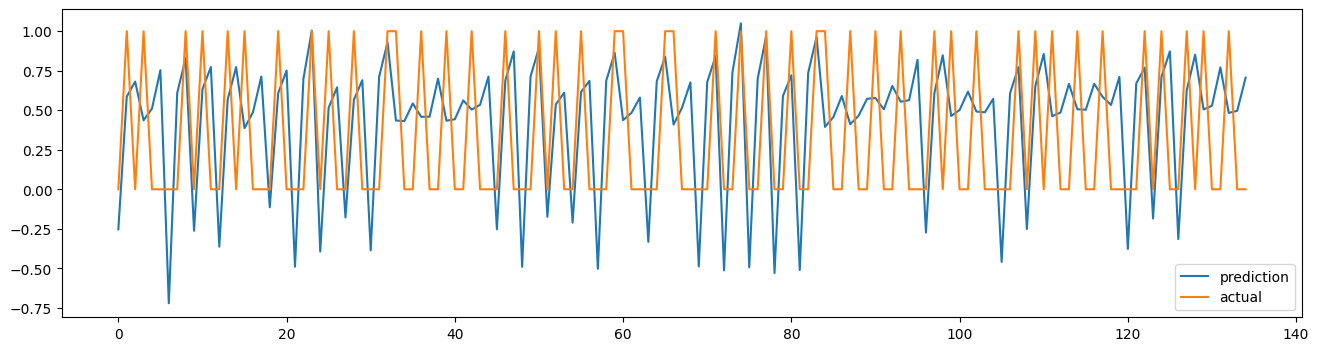

In [205]:
df.plot(figsize=(16,4))

In [206]:
from sklearn.metrics import mean_absolute_error
import pandas as pd

# Assuming 'pred' is the predicted values and 'y_test' is the true labels

# Calculate the mean absolute error
mae = mean_absolute_error(pred[:45], y_test)
print("Mean Absolute Error:", mae)



Mean Absolute Error: 0.4966496205169813


# Second approach to  creating the ELM neural network from scratch

In [207]:
iris = load_iris()
X = iris.data
y = iris.target
y.shape


(150,)

In [208]:
# Normalize the features
scaler = StandardScaler()
X_train= scaler.fit_transform(X)
print(X_train.shape)

from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder()
o_hot=onehot.fit_transform(y.reshape(-1,1)).toarray()
print(o_hot.shape)

(150, 4)
(150, 3)


In [209]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_train, o_hot, test_size=0.3)
print('Train size: {train}, Test size: {test}'.format(train=x_train.shape[0], test=x_test.shape[0]))
x_train.shape,y_train.shape,x_test.shape,y_test.shape

Train size: 105, Test size: 45


((105, 4), (105, 3), (45, 4), (45, 3))

In [210]:
INPUT_LENGHT = x_train.shape[1] # 784 
HIDDEN_UNITS = 4
num_classes=3
Win = np.random.normal(size=[INPUT_LENGHT, HIDDEN_UNITS])
# bias=np.zeros(size=[1,INPUT_LENG HT]) 
bias1 = np.zeros((1, HIDDEN_UNITS))
bias2=  np.zeros((1, num_classes))   
print('Input Weight shape: {shape}'.format(shape=Win.shape))
print('Input bias1 shape: {shape}'.format(shape=bias1.shape))
print('Input bias2 shape: {shape}'.format(shape=bias2.shape))
print(x_train.shape[1] )

Input Weight shape: (4, 4)
Input bias1 shape: (1, 4)
Input bias2 shape: (1, 3)
4


In [211]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [212]:
def softmax( x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)

In [213]:
def input_to_hidden(x):
    a = sigmoid(np.dot(x, Win)+bias1)
    return a

In [214]:
X = input_to_hidden(x_train)
print(X.shape)
Xt = np.transpose(X)
print(Xt.shape)
Wout = np.dot(np.linalg.inv(np.dot(Xt, X)), np.dot(Xt, y_train))
# H_inverse = np.dot(np.linalg.inv(np.dot(Xt,X)),Xt)
# Wout = np.dot(H_inverse,y_train)

print('Output weights shape: {shape}'.format(shape=Wout.shape))
print(Xt.shape)

(105, 4)
(4, 105)
Output weights shape: (4, 3)
(4, 105)


In [215]:
def predict(x):
    x = input_to_hidden(x)
    y =np.dot(x, Wout)+bias2
    
    
    return np.argmax(y,axis=1)

In [216]:
y = predict(x_test)
# print(y)
# print(y_train)
correct = 0
total = y.shape[0]
for i in range(total):
    predicted = np.argmax(y[i])
    test = np.argmax(y_test[i])
    correct = correct + (1 if predicted == test else 0)
print('Accuracy: {:f}'.format(correct/total))

Accuracy: 0.311111


# same in one cell

# The same after converting into classs

In [256]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.stats import randint   
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


class MyModel:
    def __init__(self, input_length, hidden_units, num_classes):
        self.input_length = input_length
        self.hidden_units = hidden_units
        self.num_classes = num_classes
        self.Win = None
        self.bias1 = None
        self.bias2 = None
        self.Wout = None

    def load_data(self):
        iris = load_iris()
        X = iris.data
        y = iris.target
        return X, y

    def preprocess_data(self, X, y):
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X)
        onehot=OneHotEncoder()
        y_train=onehot.fit_transform(y.reshape(-1,1)).toarray()
        
#         num_classes = 3
#         y_train = np.eye(num_classes)[y]
        
        return X_train, y_train

    def split_data(self, X_train, y_train, test_size=0.3):
        x_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size)
        return x_train, x_test, y_train, y_test

    def initialize_weights(self):
        self.Win = np.random.normal(size=[self.input_length, self.hidden_units])
        self.bias1 = np.zeros((1, self.hidden_units))
        self.bias2 = np.zeros((1, self.num_classes))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def input_to_hidden(self, x):
        a = self.sigmoid(np.dot(x, self.Win) + self.bias1)
        return a

    def train(self, x_train, y_train):
        X = self.input_to_hidden(x_train)
        Xt = np.transpose(X)
        self.Wout = np.dot(np.linalg.inv(np.dot(Xt, X)), np.dot(Xt, y_train))

    def predict(self, x):
        x = self.input_to_hidden(x)
#         y = self.softmax(np.dot(x, self.Wout) + self.bias2)
        y=np.dot(x,self.Wout)+self.bias2
        return np.argmax(y, axis=1)

# Usage example:
model = MyModel(input_length=4, hidden_units=10, num_classes=3)
X, y = model.load_data()
X_train, y_train = model.preprocess_data(X, y)
x_train, x_test, y_train, y_test = model.split_data(X_train, y_train, test_size=0.3)
model.initialize_weights()
model.train(x_train, y_train)
predictions = model.predict(x_test)
print(predictions)


[0 0 2 2 2 0 1 1 2 0 1 0 0 2 2 0 2 1 0 1 0 0 2 0 1 2 2 1 2 0 0 1 2 1 2 1 2
 2 1 0 2 0 1 0 1]


In [257]:
correct_predictions = np.sum(predictions == np.argmax(y_test, axis=1))
total_examples = len(y_test)
accuracy = correct_predictions / total_examples
print("Accuracy:", accuracy)

Accuracy: 0.9333333333333333


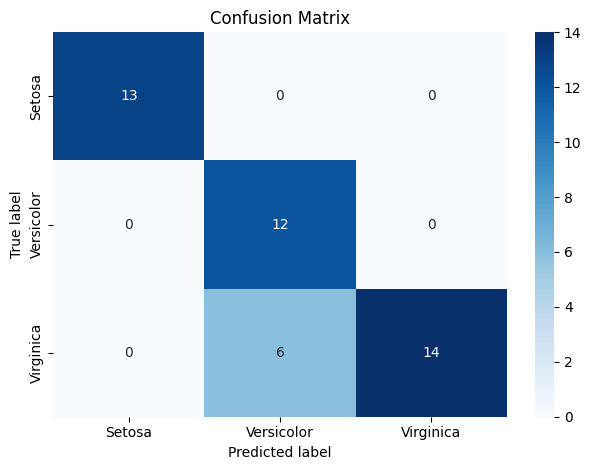

In [246]:
cm = confusion_matrix(np.argmax(y_test, axis=1), predictions)

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Customize the plot
classes = ['Setosa', 'Versicolor', 'Virginica']
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(len(classes)) + 0.5, classes)
plt.yticks(np.arange(len(classes)) + 0.5, classes)

# Ensure the plot is displayed correctly
plt.tight_layout()

# Show the plot
plt.show()


# After applying randomsearch cv in this code for finding the best hidden layer

In [259]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint   
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import OneHotEncoder


class MyModel(BaseEstimator, ClassifierMixin):
    def __init__(self, input_length, hidden_units, num_classes):
        self.input_length = input_length
        self.hidden_units = hidden_units
        self.num_classes = num_classes
        self.Win = None
        self.bias1 = None
        self.bias2 = None
        self.Wout = None

    def load_data(self):
        iris = load_iris()
        X = iris.data
        y = iris.target
        return X, y

    def preprocess_data(self, X, y):
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X)
        onehot=OneHotEncoder()
        y_train=onehot.fit_transform(y.reshape(-1,1)).toarray()

        
#         num_classes = 3
#         y_train = one_hot
        
        return X_train, y_train

    def split_data(self, X_train, y_train, test_size=0.3):
        x_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size)
        return x_train, x_test, y_train, y_test

    def initialize_weights(self):
        self.Win = np.random.normal(size=[self.input_length, self.hidden_units])
        self.bias1 = np.zeros((1, self.hidden_units))
        self.bias2 = np.zeros((1, self.num_classes))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def input_to_hidden(self, x): 
        a = self.sigmoid(np.dot(x, self.Win) + self.bias1)
        return a

    def train(self, x_train, y_train):
        X = self.input_to_hidden(x_train)
        Xt = np.transpose(X)
        self.Wout = np.dot(np.linalg.inv(np.dot(Xt, X)), np.dot(Xt, y_train))

    def predict(self, x):
        x = self.input_to_hidden(x)
#         y = self.softmax(np.dot(x, self.Wout) + self.bias2)
        y=np.dot(x,self.Wout)+self.bias2
        return np.argmax(y, axis=1)

    def score(self, x, y):
        y_pred = self.predict(x)
        return np.mean(y_pred == y)

    def fit(self, X, y):
        self.initialize_weights()
        self.train(X, y)

# here applying randomsearchcv for finding the best hidden layer 

    def find_best_hidden_units(self, x_train, y_train):
        param_dist = {
            'hidden_units': randint(4, 20)  # Adjust the range as desired
        }

        random_search = RandomizedSearchCV(estimator=self, param_distributions=param_dist, n_iter=10)
        random_search.fit(x_train, y_train)

        best_hidden_units = random_search.best_params_['hidden_units']
        return best_hidden_units

# Usage example:
model = MyModel(input_length=4, hidden_units=4, num_classes=3)
X, y = model.load_data()
X_train, y_train = model.preprocess_data(X, y)
x_train, x_test, y_train, y_test = model.split_data(X_train, y_train, test_size=0.3)
best_hidden_units = model.find_best_hidden_units(x_train, y_train)
print("Best hidden units:", best_hidden_units)


C:\Users\DELL\AppData\Local\Temp\ipykernel_4640\4090957861.py:71: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  return np.mean(y_pred == y)


Best hidden units: 8


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

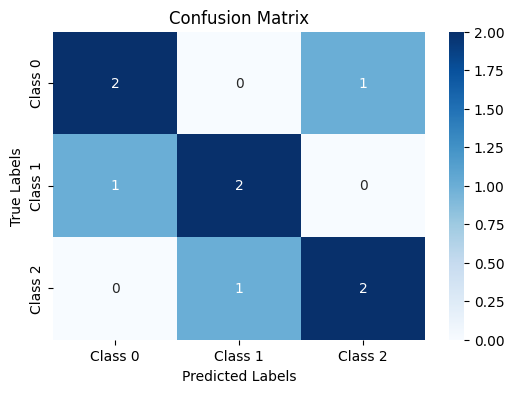

In [273]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example ground truth and predicted labels
y_true = np.array([1, 0, 1, 1, 0, 2, 0, 2, 2])
y_pred = np.array([1, 0, 0, 1, 0, 1, 2, 2, 2])

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1', 'Class 2'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Implementation of K-flod cross validation from scratch

In [260]:
iris = load_iris()
X = iris.data
y = iris.target

In [261]:
from sklearn.preprocessing import StandardScaler

In [262]:
scaling=StandardScaler()
X=scaling.fit_transform(X)

In [263]:
X.shape

(150, 4)

In [264]:
print("after scaling shape of x",X.shape)

num_classes = len(np.unique(y))
y= np.eye(num_classes)[y]

print("after encoding target the shape is",y.shape)

after scaling shape of x (150, 4)
after encoding target the shape is (150, 3)


In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [266]:
# from sklearn.neighbors import KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)


KNeighborsClassifier()

In [267]:
model.score(x_test,y_test)

0.13333333333333333

In [272]:
import numpy as np

def k_fold_cross_validation(X, y, k, model):
    iris = load_iris()
    X = iris.data
    y = iris.target

    k=5
    
    from sklearn.preprocessing import StandardScaler
    scaling=StandardScaler()
    X=scaling.fit_transform(X)
    X.shape
    
    
    print("after encoding target the shape is",y.shape)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    from sklearn.neighbors import KNeighborsClassifier

    from sklearn.neighbors import KNeighborsClassifier
    model=KNeighborsClassifier(n_neighbors=5)
    model.fit(x_train,y_train)

    
    n = len(X)
    fold_size = n // k
    scores = []

    # Shuffle the data randomly
    indices = np.random.permutation(n)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    # Perform k-fold cross-validation
    for i in range(k):
        # Prepare the training and testing data for this fold
        start = i * fold_size
        end = start + fold_size

        X_test = X_shuffled[start:end]
        y_test = y_shuffled[start:end]

        X_train = np.concatenate((X_shuffled[:start], X_shuffled[end:]), axis=0)
        y_train = np.concatenate((y_shuffled[:start], y_shuffled[end:]), axis=0)

        print(len(x_train))
        print(len(x_test))
#         print(y_train.shape)
        
        # Train the model on the training data
        model.fit(X_train, y_train)

        # Evaluate the model on the testing data
        ac= model.score(X_test, y_test)
#         score=[]

        scores.append(ac)

    return scores




scores=k_fold_cross_validation(X, y, k,model)
print(scores)

after encoding target the shape is (150,)
105
45
105
45
105
45
105
45
105
45
[0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667]


In [270]:
import tensorflow as tf

In [ ]:
ft.keras.layers.SimpleRNN(rnn_units)